In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

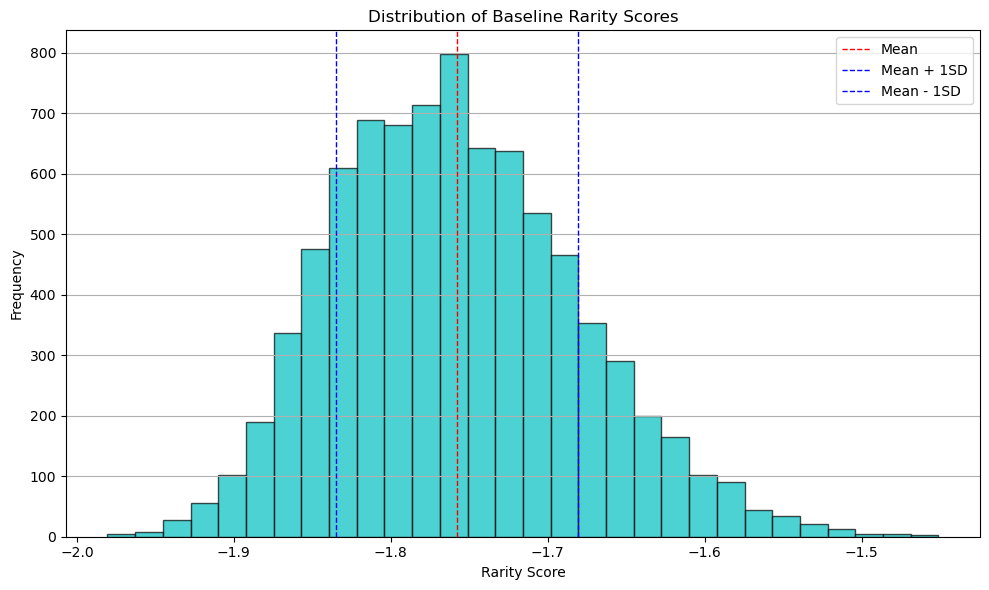

In [2]:
baseline_scores = np.loadtxt('baseline.txt')
baseline_scores = np.array([score for score in baseline_scores if score != 0]) #drop out values of 0 
mean_baseline = np.mean(baseline_scores)
std_baseline = np.std(baseline_scores)

plt.figure(figsize=(10, 6))
plt.hist(baseline_scores, bins=30, color='c', edgecolor='black', alpha=0.7)
plt.axvline(mean_baseline, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_baseline + std_baseline, color='b', linestyle='dashed', linewidth=1, label='Mean + 1SD')
plt.axvline(mean_baseline - std_baseline, color='b', linestyle='dashed', linewidth=1, label='Mean - 1SD')
plt.title('Distribution of Baseline Rarity Scores')
plt.xlabel('Rarity Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Add Gaussian Noise Experiment

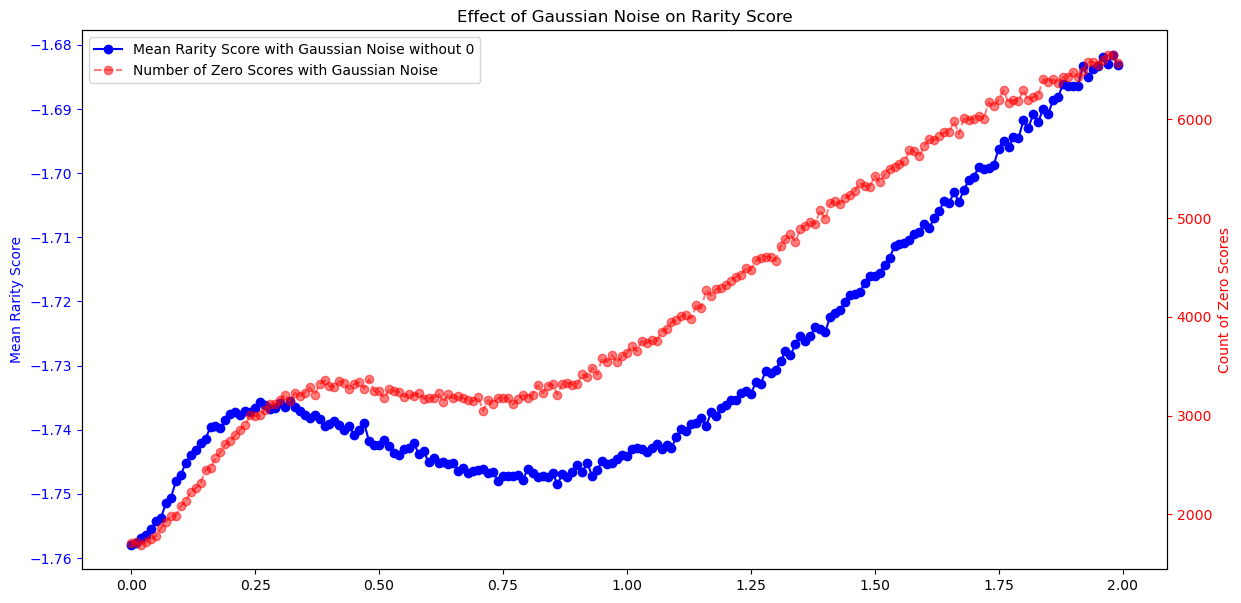

[-1.75792425 -1.75771002 -1.75684033 -1.75640337 -1.75541181 -1.75421769
 -1.75372854 -1.7514724  -1.75062814 -1.74804089 -1.74703672 -1.74517467
 -1.74390719 -1.74313699 -1.74198783 -1.74140704 -1.73954473 -1.73944654
 -1.73979165 -1.73847105 -1.73747449 -1.73718387 -1.7376322  -1.73713428
 -1.73727355 -1.7366304  -1.73568888 -1.73620246 -1.73679165 -1.73661356
 -1.73581151 -1.73644309 -1.73553011 -1.73642635 -1.73708695 -1.7377444
 -1.73818354 -1.73772154 -1.73825319 -1.7393605  -1.73906398 -1.73864924
 -1.73921063 -1.74006367 -1.73946336 -1.74082368 -1.74010524 -1.73899701
 -1.7418226  -1.7423256  -1.74232862 -1.74160298 -1.74251222 -1.74363694
 -1.74387526 -1.74306914 -1.74279406 -1.74202655 -1.74380094 -1.74333073
 -1.74507173 -1.74433946 -1.74511497 -1.74496033 -1.74537678 -1.74520665
 -1.74645376 -1.74594681 -1.74669524 -1.74635364 -1.74622767 -1.7461556
 -1.74671283 -1.74663378 -1.74792711 -1.74719834 -1.74719781 -1.74719225
 -1.74704805 -1.74779617 -1.74608491 -1.7467105  -1.7

In [15]:
def plot_2axes(path):

    mean_scores_noise = []
    zero_scores_noise = []
    sigmas = []

    for filename in os.listdir(path):
        if filename.endswith("score.txt"):
            _, _, sigma, _ = filename.split('_')
            # sigma = sigma.removesuffix(".txt")
            sigmas.append(sigma)
            
            scores = np.loadtxt(os.path.join(path, filename))
            scores_non_zero = scores[scores != 0]
            mean_score = np.mean(scores_non_zero) if scores_non_zero.size else 0
            mean_scores_noise.append(mean_score)
            zero_scores_noise.append(np.sum(scores == 0))

    # sigmas to float for plotting
    sigmas_float = [float(s) for s in sigmas]

    # Sort results based on sigma values
    sorted_indices = np.argsort(sigmas_float)
    sigmas_sorted = np.array(sigmas_float)[sorted_indices]
    mean_scores_sorted = np.array(mean_scores_noise)[sorted_indices]
    zero_scores_sorted = np.array(zero_scores_noise)[sorted_indices]

    plt.figure(figsize=(14, 7))
    # Left y-axis will represent the mean score
    line1, = plt.plot(sigmas_sorted, mean_scores_sorted, color='b', marker='o', label='Mean Rarity Score with Gaussian Noise without 0')
    plt.ylabel('Mean Rarity Score', color='b')
    plt.tick_params('y', colors='b')

    # Second y-axis for the number of zeros
    ax2 = plt.twinx()
    line2, = ax2.plot(sigmas_sorted, zero_scores_sorted, color='r', marker='o', linestyle='--', label='Number of Zero Scores with Gaussian Noise', alpha=0.5)
    ax2.set_ylabel('Count of Zero Scores', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Effect of Gaussian Noise on Rarity Score')
    plt.xlabel('Sigma (Noise Level)')
    plt.xticks(rotation=45)

    # Combine legends of both the axes
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    plt.legend(lines, labels, loc='upper left')

    # plt.tight_layout()
    plt.show()
    print(mean_scores_sorted)
    print(zero_scores_sorted)
    print(sigmas_sorted)
    
plot_2axes('add_gaussian_noise/')
